In [1]:
import keras

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 1s 1us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

Każdy przykład jest listą wartości całkowitoliczbowych (indeksów słów) — takie samo rozwiązanie zostało zaprezentowane w przykładzie zbioru IMDB:

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Kod dekodujący recenzję. Zauważ, że indeksy są przesunięte o 3, ponieważ pod indeksami o numerach 0, 1 i 2 
# znajdują się indeksy symbolizujące „wypełnienie”, „początek sekwencji” i „nieznane słowo”.
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 1us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Tabela etykiet przykładów zawiera wartości całkowitoliczbowe znajdujące się w zakresie od 0 do 45 (są to indeksy tematów):

In [8]:
train_labels[10]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Zbiór treningowy w postaci wektora.
x_train = vectorize_sequences(train_data)
# Zbiór testowy w postaci wektora.
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Etykiety zbioru treningowego w postaci wektora.
one_hot_train_labels = to_one_hot(train_labels)
# Etykiety zbioru testowego w postaci wektora.
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 78ms/step - loss: 2.6866 - accuracy: 0.5115 - val_loss: 1.8196 - val_accuracy: 0.6030
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4551 - accuracy: 0.6946 - val_loss: 1.3296 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0578 - accuracy: 0.7760 - val_loss: 1.1441 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8329 - accuracy: 0.8230 - val_loss: 1.0576 - val_accuracy: 0.7570
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6661 - accuracy: 0.8591 - val_loss: 0.9756 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5416 - accuracy: 0.8864 - val_loss: 0.9272 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.4350 - accuracy: 0.9108 - val_loss: 0.9405 - val_accuracy: 0.7910
Epoch 8/20
16

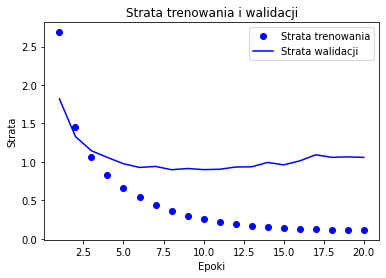

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

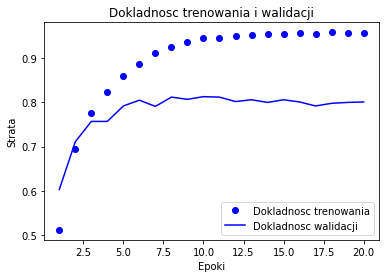

In [20]:
plt.clf()   # Czyszczenie rysunku.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 2s 68ms/step - loss: 2.6649 - accuracy: 0.5296 - val_loss: 1.7590 - val_accuracy: 0.6370
Epoch 2/8
16/16 [==============================] - 1s 41ms/step - loss: 1.4532 - accuracy: 0.7058 - val_loss: 1.3091 - val_accuracy: 0.7060
Epoch 3/8
16/16 [==============================] - 1s 51ms/step - loss: 1.0836 - accuracy: 0.7712 - val_loss: 1.1666 - val_accuracy: 0.7340
Epoch 4/8
16/16 [==============================] - 1s 50ms/step - loss: 0.8556 - accuracy: 0.8118 - val_loss: 1.0313 - val_accuracy: 0.7780
Epoch 5/8
16/16 [==============================] - 1s 42ms/step - loss: 0.6794 - accuracy: 0.8547 - val_loss: 0.9497 - val_accuracy: 0.8050
Epoch 6/8
16/16 [==============================] - 1s 44ms/step - loss: 0.5399 - accuracy: 0.8864 - val_loss: 0.9170 - val_accuracy: 0.8060
Epoch 7/8
16/16 [==============================] - 1s 48ms/step - loss: 0.4313 - accuracy: 0.9112 - val_loss: 0.8887 - val_accuracy: 0.8090
Epoch 8/8
71/71 [===

In [22]:
results

[0.9851242899894714, 0.7831701040267944]

In [23]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19278717720391808

## Generowanie przewidywań dotyczących nowych danych

Możemy zweryfikować zwracanie przez metodę predict naszej instancji modelu rozkładu prawdopodobieństwa wszystkich 46 tematów. Wygenerujmy przewidywania dla wszystkich elementów testowego zbioru danych.

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

1.0000001

Najwyższa wartość wektora wskazuje przewidywaną klasę — klasę, do której najprawdopodobniej należy dana próbka:

In [27]:
np.argmax(predictions[0])

3

## Inne sposoby obsługi etykiet i funkcji straty

In [28]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [29]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 3.0051 - accuracy: 0.2527 - val_loss: 2.3350 - val_accuracy: 0.5490
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 1.8214 - accuracy: 0.5809 - val_loss: 1.5955 - val_accuracy: 0.6060
Epoch 3/20
63/63 [==============================] - 1s 21ms/step - loss: 1.3637 - accuracy: 0.6429 - val_loss: 1.4499 - val_accuracy: 0.6580
Epoch 4/20
63/63 [==============================] - 1s 20ms/step - loss: 1.1753 - accuracy: 0.7137 - val_loss: 1.3796 - val_accuracy: 0.6790
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 1.0454 - accuracy: 0.7527 - val_loss: 1.3452 - val_accuracy: 0.6990
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 0.9429 - accuracy: 0.7734 - val_loss: 1.3313 - val_accuracy: 0.7000
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.8587 - accuracy: 0.7871 - val_loss: 1.3546 - val_accuracy: 0.7010
Epoch 8/20
63


Dokładność sieci w procesie walidacji osiąga teraz wartość szczytową na poziomie około 71%, a więc dokładność spadła w skali bezwzględnej o 8%. Wynika to głównie z tego, że sieć stara się skompresować wiele informacji w zbyt małej liczbie wymiarów warstwy pośredniej. Co prawda sieć jest w stanie dokonać podziału na 46 klas, a więc może ona zakodować większość niezbędnych informacji w formie ośmiowymiarowych reprezentacji, ale przestrzeń taka jest zbyt mała, aby umieścić w niej wszystkie informacje.